In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np # for numerical data
import seaborn as sns # data visualisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split # for spliting Test and Training Data
from sklearn.linear_model import PassiveAggressiveClassifier # used for classification
from sklearn.naive_bayes import MultinomialNB # used in NLP for implementing Naive bayes
from sklearn import metrics
import matplotlib.pyplot as plt # data visualisation
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [2]:
str1="I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."


lst = [str1]
lst

['I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.']

In [3]:
import nltk
import sklearn
import bs4 #beatifulsoup4
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The scikit-learn version is {}.'.format(bs4.__version__))

The nltk version is 3.8.1.
The scikit-learn version is 1.3.2.
The scikit-learn version is 4.12.2.


In [4]:
df=pd.read_csv('drugsComTrain_raw.csv')

In [5]:
df.to_csv('drugsComTrain_raw.csv',index=False)

In [6]:
train = pd.read_csv('drugsComTrain_raw.csv')
test = pd.read_csv('drugsComTest_raw.csv')


In [7]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [8]:
df.condition.value_counts()

Birth Control                                                          20392
Depression                                                              6434
Pain                                                                    4308
Anxiety                                                                 4144
Acne                                                                    3979
Bipolar Disorde                                                         2946
Insomnia                                                                2621
Weight Loss                                                             2570
Obesity                                                                 2556
ADHD                                                                    2365
Diabetes, Type 2                                                        1851
Emergency Contraception                                                 1776
Vaginal Yeast Infection                                                 1654

In [9]:
conditions_of_interest = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorder', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD', 'Diabetes, Type 2', 'Emergency Contraception', 'High Blood Pressure', 'Vaginal Yeast Infection', 'Abnormal Uterine Bleeding', 'Bowel Preparation', 'Fibromyalgia', 'Smoking Cessation', 'Migraine', 'Anxiety and Stress', 'Major Depressive Disorder', 'Constipation', 'Panic Disorder', 'Chronic Pain', 'Migraine Prevention', 'Urinary Tract Infection', 'Muscle Spasm', 'Osteoarthritis', 'Generalized Anxiety Disorder', 'Erectile Dysfunction', 'Opiate Dependence', 'Irritable Bowel Syndrome', 'Rheumatoid Arthritis', 'Allergic Rhinitis', 'Bacterial Infection', 'Cough', 'Sinusitis', 'Nausea/Vomiting', 'GERD', 'Multiple Sclerosis', 'Overactive Bladder', 'Hyperhidrosis', 'Hepatitis C', 'Back Pain', 'HIV Infection', 'High Cholesterol', 'Psoriasis', 'Schizophrenia', 'Constipation, Chronic', 'Obsessive Compulsive Disorder', 'Restless Legs Syndrome', 'Benign Prostatic Hyperplasia', 'Endometriosis', 'Bronchitis', 'Bacterial Vaginitis', 'Rosacea', 'Seizures', 'Narcolepsy', 'Hypogonadism, Male', 'Asthma, Maintenance', 'Headache', 'Underactive Thyroid', 'Not Listed / Other', 'Schizoaffective Disorder', 'Onychomycosis, Toenail', 'Bladder Infection', 'Social Anxiety Disorder', 'Alcohol Dependence', 'Herpes Simplex', 'Osteoporosis', 'Cold Sores', 'Epilepsy', 'Cough and Nasal Congestion', 'Menstrual Disorders', 'Influenza', 'Plaque Psoriasis', 'Opiate Withdrawal', 'Psoriatic Arthritis', 'Post Traumatic Stress Disorder', 'Postmenopausal Symptoms', 'Polycystic Ovary Syndrome', 'Inflammatory Conditions', 'Premenstrual Dysphoric Disorder', 'Nasal Congestion', 'Pneumonia', 'Chlamydia Infection', 'Atrial Fibrillation', 'Breast Cancer', 'Urticaria', 'Helicobacter Pylori Infection', 'Hot Flashes', 'Neuropathic Pain', 'Anesthesia', 'COPD, Maintenance', 'Ulcerative Colitis', 'Constipation, Drug Induced', 'Skin or Soft Tissue Infection', 'Asthma', 'Alcohol Withdrawal', 'Ankylosing Spondylitis', 'Motion Sickness', 'Gout, Acute', 'Crohn\'s Disease, Maintenance', 'Performance Anxiety', 'Seizure Prevention', 'Atrophic Vaginitis', 'Allergies', 'Interstitial Cystitis', 'Peripheral Neuropathy', 'Diabetic Peripheral Neuropathy', 'Hashimoto\'s Disease', 'Upper Respiratory Tract Infection', 'Crohn\'s Disease', 'Urinary Incontinence', 'Herpes Simplex, Suppression', 'Cluster Headaches', 'Eczema', 'Sedation', 'Atopic Dermatitis', 'Trigeminal Neuralgia', 'Prevention of Thromboembolism in Atrial Fibrillation', 'COPD', 'Ovarian Cysts', 'Otitis Media', 'Hypothyroidism, After Thyroid Removal', 'Borderline Personality Disorder', 'Dry Eye Disease', 'Bacterial Skin Infection', 'Diverticulitis', 'Diabetes, Type 1', 'Period Pain', 'Asthma, Acute', 'Ulcerative Colitis, Active', 'Sciatica', 'Prostate Cancer', 'Nausea/Vomiting of Pregnancy', 'Parkinson\'s Disease', 'Kidney Infections', 'Cold Symptoms', 'Diarrhea', 'Strep Throat', 'Tonsillitis/Pharyngitis', 'Keratosis', 'Gout', 'Breast Cancer, Metastatic', 'Dietary Supplementation', 'Human Papilloma Virus', 'Vertigo', 'Urinary Tract Stones']

df_train = df[df['condition'].isin(conditions_of_interest)]


In [10]:
df.shape

(114280, 7)

In [11]:
df_train.shape

(94874, 7)

In [12]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

## **EDA**

In [13]:
X.condition.value_counts()

Birth Control                                           20392
Depression                                               6434
Pain                                                     4308
Anxiety                                                  4144
Acne                                                     3979
Insomnia                                                 2621
Weight Loss                                              2570
Obesity                                                  2556
ADHD                                                     2365
Diabetes, Type 2                                         1851
Emergency Contraception                                  1776
Vaginal Yeast Infection                                  1654
High Blood Pressure                                      1635
Abnormal Uterine Bleeding                                1470
Bowel Preparation                                        1342
Smoking Cessation                                        1265
Migraine

In [14]:
X.head()

,condition,review
1,ADHD,"""My son is halfway through his fourth week of ..."
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
4,Opiate Dependence,"""Suboxone has completely turned my life around..."
5,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard..."


In [15]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

In [16]:
from wordcloud import WordCloud
plt.figure(figsize = (5,5))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

In [17]:
plt.figure(figsize = (5,5))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

In [18]:
plt.figure(figsize = (5,5)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

In [19]:
plt.figure(figsize = (5,5)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

### **Data Pre-Processing**

In [20]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [21]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [22]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [23]:
X['review'][11]

'I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.'

In [24]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\Users\Bhargav Ayare\AppData\Local\Temp\ipykernel_18640\999061969.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [25]:
X.head()

,condition,review
1,ADHD,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"
4,Opiate Dependence,"Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin."
5,Benign Prostatic Hyperplasia,"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up &amp; hurt! Leg/ankles aches severe lower bowel preassure like you need to go #2 but can&#039;t! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I&#039;m 50 &amp; work out 3Xs a week. Not worth side effects!"


## **Stopword Removal**

In [26]:
import nltk
nltk.download('stopwords')


from nltk.corpus import stopwords

stop = stopwords.words('english')



[nltk_data] Downloading package stopwords to C:\Users\Bhargav
[nltk_data]     Ayare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Bhargav
[nltk_data]     Ayare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


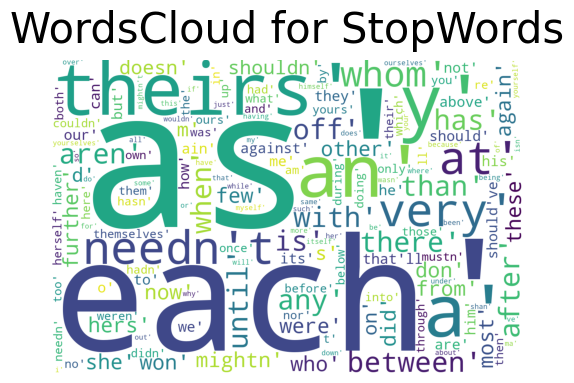

In [29]:
from wordcloud import WordCloud, STOPWORDS

stops = set(stopwords.words('english'))
def plot_wordcloud(text, max_words = 200, figure_size=(5, 5), title = None, title_size = 30, image_color = None):

    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    random_state = 42,
                    width = 1200,
                    height = 800,)
    wordcloud.generate(str(text))

    plt.figure(figsize = figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()

plot_wordcloud(stops, title="WordsCloud for StopWords")

# **Lemmitization**

In [30]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [31]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [32]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("dogs"))
print(lemmatizer.lemmatize("churches"))
print(lemmatizer.lemmatize("books"))


[nltk_data] Downloading package wordnet to C:\Users\Bhargav
[nltk_data]     Ayare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


dog
church
book


In [33]:
from bs4 import BeautifulSoup
import re

In [34]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [35]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\Bhargav Ayare\AppData\Local\Temp\ipykernel_18640\4279475652.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [36]:
X.head()

### **Creating Features and Target Variable**

In [37]:
X_feat=X['review_clean']
y=X['condition']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





### **Bag of Words**

In [40]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [41]:
count_train

<75899x30452 sparse matrix of type '<class 'numpy.int64'>'
	with 2256908 stored elements in Compressed Sparse Row format>

# **Machine Learning Model : Naive Bayes**

accuracy:   0.632
Confusion matrix, without normalization


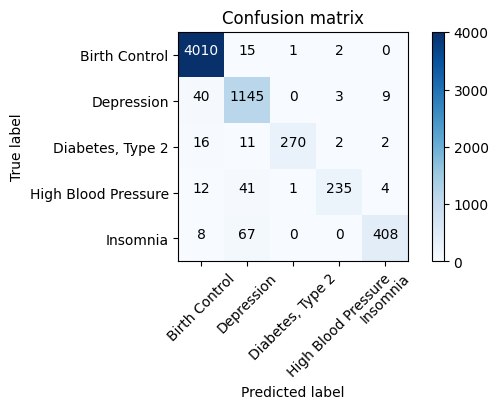

In [42]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
plt.figure(figsize=(6,4))
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure','Insomnia'])

# **Machine Learning Model : Passive Aggressive Classifier**

Confusion matrix, without normalization
Accuracy:   0.726
Precision: 0.611
Recall: 0.612
F1 Score: 0.604


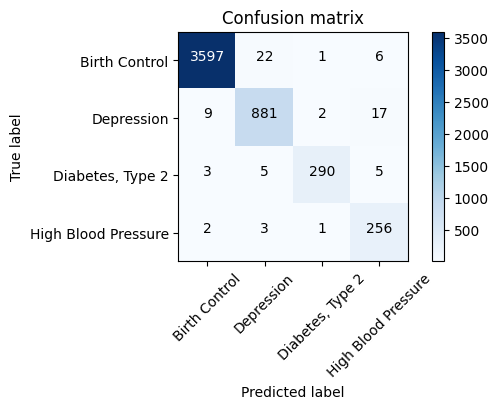

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Assuming 'count_train', 'y_train', 'count_test', 'y_test' are already defined
passive = PassiveAggressiveClassifier(class_weight='balanced')
passive.fit(count_train, y_train)
pred = passive.predict(count_test)

# Calculate metrics
score = metrics.accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='macro')  # Adjust 'average' as needed
recall = recall_score(y_test, pred, average='macro')       # Adjust 'average' as needed
f1 = f1_score(y_test, pred, average='macro')               # Adjust 'average' as needed

# Plotting confusion matrix
plt.figure(figsize=(6,4))
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

# Printing results
print("Accuracy:   %0.3f" % score)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


### **TFIDF**

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

### **Machine Learning Model : Passive Agressive Classifier - TFIDF Unigram**

Confusion matrix, without normalization
Accuracy:   0.767
Precision: 0.611
Recall: 0.612
F1 Score: 0.604


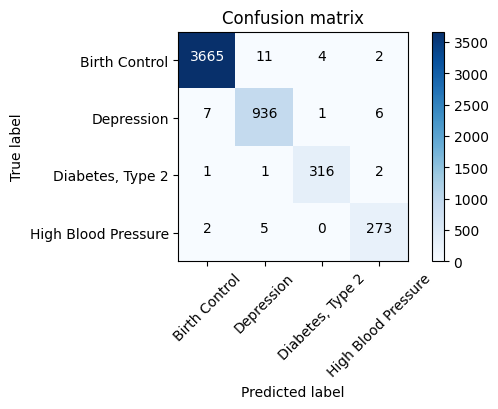

In [45]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier(class_weight='balanced')
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
plt.figure(figsize=(6,4))
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

print("Accuracy:   %0.3f" % score)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


### **TFIDF : Bigrams**

In [46]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

Confusion matrix, without normalization
Accuracy:   0.818
Precision: 0.611
Recall: 0.612
F1 Score: 0.604


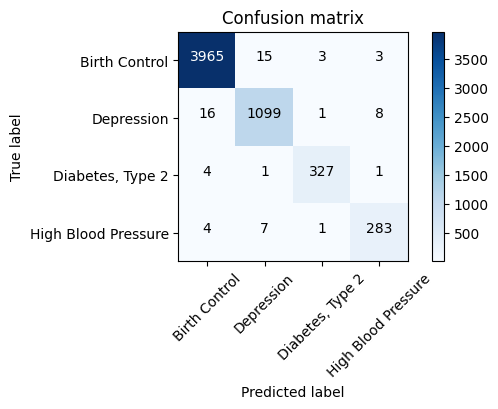

In [47]:
pass_tf = PassiveAggressiveClassifier(class_weight='balanced')
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
plt.figure(figsize=(6,4))
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

print("Accuracy:   %0.3f" % score)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

### **TFIDF : Trigrams**

Confusion matrix, without normalization
Accuracy:   0.819
Precision: 0.783
Recall: 0.680
F1 Score: 0.716


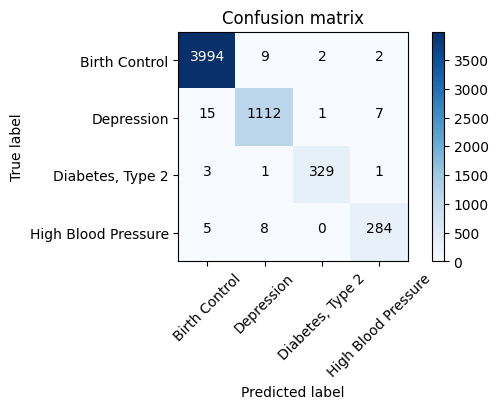

In [48]:
from sklearn.metrics import f1_score, precision_score, recall_score
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
f1 = f1_score(y_test, pred, average='macro')

tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier(class_weight='balanced')
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
plt.figure(figsize=(6,4))

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

print("Accuracy:   %0.3f" % score)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


**Most Important Features**

In [49]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print(classlabel, feat, coef)

most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, 'Birth Control')


Birth Control removed 5.000109408491543
Birth Control pregnant 5.4350336950578715
Birth Control period 5.69876868658934
Birth Control moody 5.817864398594078
Birth Control nuvaring 6.877651794365518
Birth Control skyla 7.2901763426540604
Birth Control insertion 7.52261563280733
Birth Control implant 8.075177292899138
Birth Control implanon 8.521324784394036
Birth Control nexplanon 10.121193957764476


In [50]:
most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, 'Depression')

Depression trintellix 3.8637961198639523
Depression effexor 4.1758979516587384
Depression zoloft 4.353430993487361
Depression abilify 4.385667699632782
Depression brintellix 5.5628134361684936
Depression antidepressant 5.586526855715543
Depression pristiq 6.67630987264625
Depression wellbutrin 6.993685612315678
Depression viibryd 7.031844910897205
Depression depression 10.096777339940985


In [51]:
most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, 'High Blood Pressure')

High Blood Pressure azor 3.227501466736285
High Blood Pressure blood pressure 3.3133562260329743
High Blood Pressure amlodipine 3.4917125948206698
High Blood Pressure losartan 3.7683777325973153
High Blood Pressure diovan 3.868463465580877
High Blood Pressure benicar 4.377046082808775
High Blood Pressure bystolic 4.430715227102689
High Blood Pressure pressure 4.950816689453663
High Blood Pressure lisinopril 5.744636316475676
High Blood Pressure bp 6.623506282421724


In [52]:
most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 number 3.2639217044950466
Diabetes, Type 2 glucose 4.002870268947254
Diabetes, Type 2 januvia 4.480751944215319
Diabetes, Type 2 bydureon 5.2357335751681955
Diabetes, Type 2 victoza 5.365347065247926
Diabetes, Type 2 invokana 5.547851414077175
Diabetes, Type 2 byetta 5.640951324060839
Diabetes, Type 2 metformin 6.242775303554655
Diabetes, Type 2 sugar 7.07515723386086
Diabetes, Type 2 trulicity 7.137291284427259


# **Sample Prediction**

In [53]:
X.tail()

,condition,review,review_clean
114273,Urticaria,Best relief for hives. Prefer this over Xyzal.,best relief hive prefer xyzal
114276,HIV Infection,"I started Truvada once a day along with Isentress twice a day and my HIV Load was 28,000 and CD4% 31%. After 40 days my HIV load is &lt;20 and CD 4% 32,7. Excellent improvement considering I have experienced ZERO side effects and all other lab work came out well. I am 49 yrs old and very active.",started truvada day along isentress twice day hiv load cd day hiv load cd excellent improvement considering experienced zero side effect lab work came well yr old active
114277,Smoking Cessation,I was a smoker for 44 years and wanted to quit smoking because was going to become a grandmother. I heard about Chantix from my brother and decided to try it. I had used other things to quit but was never successful. After using Chantix for 1 week I no longer was a smoker. That was 8 years ago and I am very happy that my granddaughter has never had a grandma that smelled like smoke.,smoker year wanted quit smoking going become grandmother heard chantix brother decided try used thing quit never successful using chantix week longer smoker year ago happy granddaughter never grandma smelled like smoke
114278,Emergency Contraception,"I had unprotected sex one night realizing the next day that a condom was not in the picture. After light freaking out I went to buy the Plan B pill. I&#039;ve taken it once before almost 3 years ago before it was on the shelf. When I took it this time I had some very noticeable side effects. Cramping, stomach pain, tiredness, dizziness, nausea, lack of appetite but I would go through all of it again if it meant no kids. This pill works and I would recommend it to anyone",unprotected sex one night realizing next day condom picture light freaking went buy plan b pill taken almost year ago shelf took time noticeable side effect cramping stomach pain tiredness dizziness nausea lack appetite would go meant kid pill work would recommend anyone
114279,Pain,"Works really well , but the size of the tube compared to the box it comes in is very very deceiving , when I bought my 50g one thought it was going to be bigger when it came out the box I thought someone had switched it for a smaller version just look before you buy",work really well size tube compared box come deceiving bought g one thought going bigger came box thought someone switched smaller version look buy


In [54]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst


In [55]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [56]:
sentences = [
  "I pulled my hamstring "

  ]

In [57]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)

predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Insomnia":
        target="Insomnia"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Abnormal Uterine Bleeding":
        target="Abnormal Uterine Bleeding"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Smoking Cessation":
        target="Smoking Cessation"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Migraine":
        target="Migraine"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Anxiety and Stress":
        target="Anxiety and Stress"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Major Depressive Disorde":
        target="Major Depressive Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Major Depressive Disorde":
        target="Major Depressive Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Constipation":
        target="Constipation"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Panic Disorde":
        target="Panic Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Chronic Pain":
        target="Chronic Pain"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Migraine Prevention":
        target="Migraine Prevention"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Urinary Tract Infection":
        target="Urinary Tract Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Muscle Spasm":
        target="Muscle Spasm"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Osteoarthritis":
        target="Osteoarthritis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Generalized Anxiety Disorde":
        target="Generalized Anxiety Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Erectile Dysfunction":
        target="Erectile Dysfunction"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Opiate Dependence":
        target="Opiate Dependence"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Irritable Bowel Syndrome":
        target="Irritable Bowel Syndrome"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Rheumatoid Arthritis":
        target="Rheumatoid Arthritis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Allergic Rhinitis":
        target="Allergic Rhinitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Bacterial Infection":
        target="Bacterial Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Cough":
        target="Cough"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Sinusitis":
        target="Sinusitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Nausea/Vomiting":
        target="Nausea/Vomiting"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print()
    elif label=="GERD":
        target="GERD"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Multiple Sclerosis":
        target="Multiple Sclerosis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Overactive Bladde":
        target="Overactive Bladde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Overactive Bladde":
        target="Overactive Bladde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Hyperhidrosis":
        target="Hyperhidrosis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Hepatitis C":
        target="Hepatitis C"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Back Pain":
        target="Back Pain"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="HIV Infection":
        target="HIV Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="High Cholesterol":
        target="High Cholesterol"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Psoriasis":
        target="Psoriasis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Schizophrenia":
        target="Schizophrenia"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Constipation, Chronic":
        target="Constipation, Chronic"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Obsessive Compulsive Disorder":
        target="Obsessive Compulsive Disorder"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Restless Legs Syndrome":
        target="Restless Legs Syndrome"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Benign Prostatic Hyperplasia":
        target="Benign Prostatic Hyperplasia"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Endometriosis":
        target="Endometriosis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Bronchitis":
        target="Bronchitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Bacterial Vaginitis":
        target="Bacterial Vaginitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Rosacea":
        target="Rosacea"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Seizures":
        target="Seizures"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Narcolepsy":
        target="Narcolepsy"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Birth Control":
        target="Birth Control"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Hypogonadism, Male":
        target="Hypogonadism, Male"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Asthma, Maintenance":
        target="Asthma, Maintenance"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Headache":
        target="Headache"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Underactive Thyroid":
        target="Underactive Thyroid"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Not Listed / Othe":
        target="Not Listed / Othe"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Schizoaffective Disorde":
        target="Schizoaffective Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Onychomycosis, Toenail":
        target="Onychomycosis, Toenail"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Bladder Infection":
        target="Bladder Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Social Anxiety Disorde":
        target="Social Anxiety Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label=="Alcohol Dependence":
        target="Alcohol Dependence"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Herpes Simplex":
        target = "Herpes Simplex"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Osteoporosis":
        target = "Osteoporosis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Cold Sores":
        target = "Cold Sores"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Epilepsy":
        target = "Epilepsy"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Cough and Nasal Congestion":
        target = "Cough and Nasal Congestion"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Menstrual Disorders":
        target = "Menstrual Disorders"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Influenza":
        target = "Influenza"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Plaque Psoriasis":
        target = "Plaque Psoriasis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Opiate Withdrawal":
        target = "Opiate Withdrawal"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Psoriatic Arthritis":
        target = "Psoriatic Arthritis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Post Traumatic Stress Disorde":
        target = "Post Traumatic Stress Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Postmenopausal Symptoms":
        target = "Postmenopausal Symptoms"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Polycystic Ovary Syndrome":
        target = "Polycystic Ovary Syndrome"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Inflammatory Conditions":
        target = "Inflammatory Conditions"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Premenstrual Dysphoric Disorde":
        target = "Premenstrual Dysphoric Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Nasal Congestion":
        target = "Nasal Congestion"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Pneumonia":
        target = "Pneumonia"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Chlamydia Infection":
        target = "Chlamydia Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Atrial Fibrillation":
        target = "Atrial Fibrillation"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Breast Cance":
        target = "Breast Cance"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Urticaria":
        target = "Urticaria"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Helicobacter Pylori Infection":
        target = "Helicobacter Pylori Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Hot Flashes":
        target = "Hot Flashes"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Neuropathic Pain":
        target = "Neuropathic Pain"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Anesthesia":
        target = "Anesthesia"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "COPD, Maintenance":
        target = "COPD, Maintenance"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Ulcerative Colitis":
        target = "Ulcerative Colitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Constipation, Drug Induced":
        target = "Constipation, Drug Induced"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Skin or Soft Tissue Infection":
        target = "Skin or Soft Tissue Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Asthma":
        target = "Asthma"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Alcohol Withdrawal":
        target = "Alcohol Withdrawal"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Ankylosing Spondylitis":
        target = "Ankylosing Spondylitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Motion Sickness":
        target = "Motion Sickness"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Gout, Acute":
        target = "Gout, Acute"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Crohn's Disease, Maintenance":
        target = "Crohn's Disease, Maintenance"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "mance Anxiety":
        target = "mance Anxiety"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Seizure Prevention":
        target = "Seizure Prevention"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Atrophic Vaginitis":
        target = "Atrophic Vaginitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Allergies":
        target = "Allergies"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Interstitial Cystitis":
        target = "Interstitial Cystitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Peripheral Neuropathy":
        target = "Peripheral Neuropathy"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Diabetic Peripheral Neuropathy":
        target = "Diabetic Peripheral Neuropathy"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Hashimoto's Disease":
        target = "Hashimoto's Disease"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Upper Respiratory Tract Infection":
        target = "Upper Respiratory Tract Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Crohn's Disease":
        target = "Crohn's Disease"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Urinary Incontinence":
        target = "Urinary Incontinence"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Herpes Simplex, Suppression":
        target = "Herpes Simplex, Suppression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Cluster Headaches":
        target = "Cluster Headaches"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Eczema":
        target = "Eczema"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Sedation":
        target = "Sedation"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Atopic Dermatitis":
        target = "Atopic Dermatitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Trigeminal Neuralgia":
        target = "Trigeminal Neuralgia"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Prevention of Thromboembolism in Atrial Fibrillation":
        target = "Prevention of Thromboembolism in Atrial Fibrillation"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "COPD":
        target = "COPD"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Ovarian Cysts":
        target = "Ovarian Cysts"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Otitis Media":
        target = "Otitis Media"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Hypothyroidism, After Thyroid Removal":
        target = "Hypothyroidism, After Thyroid Removal"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Borderline Personality Disorde":
        target = "Borderline Personality Disorde"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Dry Eye Disease":
        target = "Dry Eye Disease"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Bacterial Skin Infection":
        target = "Bacterial Skin Infection"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Diverticulitis":
        target = "Diverticulitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Diabetes, Type 1":
        target = "Diabetes, Type 1"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Period Pain":
        target = "Period Pain"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Asthma, Acute":
        target = "Asthma, Acute"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Ulcerative Colitis, Active":
        target = "Ulcerative Colitis, Active"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Sciatica":
        target = "Sciatica"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Prostate Cancer":
        target = "Prostate Cancer"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Nausea/Vomiting of Pregnancy":
        target = "Nausea/Vomiting of Pregnancy"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Parkinson's Disease":
        target = "Parkinson's Disease"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Kidney Infections":
        target = "Kidney Infections"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Cold Symptoms":
        target = "Cold Symptoms"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Diarrhea":
        target = "Diarrhea"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Strep Throat":
        target = "Strep Throat"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Tonsillitis/Pharyngitis":
        target = "Tonsillitis/Pharyngitis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Keratosis":
        target = "Keratosis"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

    elif label == "Gout":
        target = "Gout"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()


    else:
        pass


text: I pulled my hamstring  
Condition: Muscle Spasm
Top 3 Suggested Drugs:
Methocarbamol
Robaxin
Zanaflex



In [58]:
df_testsent = predict_text(sentences)
df_testsent

,test_sent,prediction
0,pulled hamstring,Muscle Spasm


In [59]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [60]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I cant get any penile erection"]))
test[0]

'Erectile Dysfunction'